##**Imports & Read Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.shape

(568454, 10)

# **Count total Records for score 1-5**

In [4]:
plt.style.use('seaborn') # setting Plot Style

In [5]:
data['Score'].value_counts()  # total rating score 

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Text(0, 0.5, 'Total Reviews')

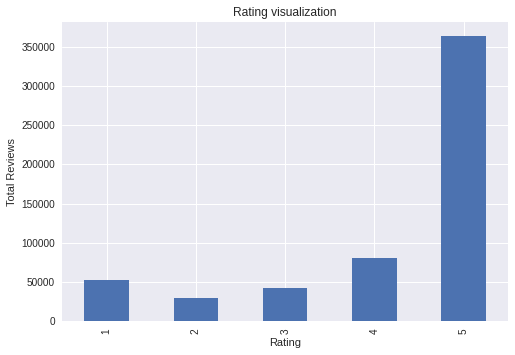

In [6]:
data['Score'].value_counts().sort_index().plot(kind='bar')  #value_count() used to produce a count for each of the unique values
plt.title('Rating visualization')                             #sort_index() is used so that the result is shown sorted by the score.
plt.xlabel('Rating')
plt.ylabel('Total Reviews')

In [7]:
data['ProductId'].value_counts()  #Total review For each Product


B007JFMH8M    913
B002QWP89S    632
B0026RQTGE    632
B002QWP8H0    632
B002QWHJOU    632
             ... 
B0052OMSMC      1
B004MZ9JLA      1
B002U2CDE2      1
B003Y5Y33S      1
B000SARHYO      1
Name: ProductId, Length: 74258, dtype: int64

# **Total review count for Each Score for Each Product**

In [8]:
Count_total = data.groupby(['ProductId','Score']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='ProductId')
Count_total

,ProductId,Score,count
0,B007JFMH8M,5,624
1,B003B3OOPA,5,517
2,B000NMJWZO,5,502
3,B002QWP8H0,5,498
4,B002QWP89S,5,498
...,...,...,...
137053,B002J9CXH8,5,1
137054,B002J9D02A,1,1
137062,B002J9J8EY,1,1
137067,B002JAU4VO,4,1


In [9]:
def findScore(productId):
  scrLst = []
  for i in range(len(data)):
    if data['ProductId'][i] == productId : 
      scrLst.append(data['Score'][i])
  return scrLst

In [10]:
scrLst = findScore('B007JFMH8M')

In [11]:
scr = pd.DataFrame(scrLst)

Text(0, 0.5, 'Total Reviews')

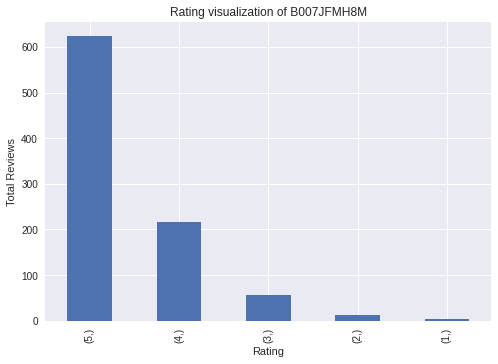

In [12]:
scr.value_counts().plot(kind='bar')  
plt.title('Rating visualization of B007JFMH8M')             
plt.xlabel('Rating')
plt.ylabel('Total Reviews')

In [13]:
words = pd.read_excel("/content/drive/MyDrive/Positive and Negative Word List.xlsx")
words.head(10)

,Negative Sense Word List,Positive Sense Word List
0,bad,good
1,don't,tasty
2,expensive,nice
3,abnormal,abound
4,abolish,abounds
5,abominable,abundance
6,abominably,abundant
7,abominate,accelerate
8,abomination,accept
9,abort,accessable


In [14]:
from collections import Counter    
list = Counter(data["Summary"].to_string().split()).most_common(500) # Getting Most used Word For Review LIMIT to 500 Words
list

[('Great', 48117),
 ('the', 37770),
 ('for', 35518),
 ('and', 31845),
 ('a', 26781),
 ('Good', 22356),
 ('but', 20494),
 ('good', 20060),
 ('I', 19097),
 ('to', 18573),
 ('of', 18148),
 ('Best', 17694),
 ('great', 16370),
 ('is', 16223),
 ('My', 15933),
 ('Not', 15298),
 ('this', 14617),
 ('not', 14432),
 ('it', 13346),
 ('The', 13329),
 ('in', 12030),
 ('my', 12027),
 ('A', 11968),
 ('Love', 11949),
 ('coffee', 11464),
 ('love', 10997),
 ('-', 10495),
 ('like', 10380),
 ('best', 10365),
 ('Very', 9755),
 ('Excellent', 9191),
 ('tea', 9153),
 ('product', 8910),
 ('with', 8641),
 ('taste', 8606),
 ('Delicious', 8171),
 ('as', 8158),
 ('Tea', 7546),
 ('dog', 7451),
 ('Coffee', 7440),
 ('you', 6951),
 ('flavor', 6793),
 ('food', 6702),
 ('are', 6593),
 ('on', 6554),
 ('...', 6431),
 ('This', 6018),
 ('loves', 5951),
 ('favorite', 5840),
 ('these', 5787),
 ('price', 5583),
 ('than', 5451),
 ('&', 5253),
 ('very', 5133),
 ('at', 4940),
 ('too', 4858),
 ('Tasty', 4557),
 ('Dog', 4490),
 ('so

In [25]:
pos = words['Positive Sense Word List'].tolist()
neg = words['Negative Sense Word List'].tolist()

['good',
 'tasty',
 'nice',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accelerate',
 'accept',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accord',
 'accredit',
 'accrue',
 'accurate',
 'accurately',
 'ace',
 'achievable',
 'achieve',
 'achievement',
 'achievements',
 'achievible',
 'action',
 'activate',
 'active',
 'acumen',
 'adaptable',
 'adaptive',
 'add',
 'addition',
 'adept',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advance',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventure',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'aff

In [16]:
positive = []
negative = []
neutral = []
for i in list:
  temp =i[0].lower()
  if temp in pos:
    positive.append(temp)
    print(temp,"Positive")
  elif temp.lower() in neg:
    negative.append(temp)
    print(temp,"Negative")
  else:
    neutral.append(temp)
    print(temp,"Neutral")

great Positive
the Neutral
for Positive
and Neutral
a Neutral
good Positive
but Neutral
good Positive
i Neutral
to Neutral
of Positive
best Positive
great Positive
is Neutral
my Neutral
not Negative
this Neutral
not Negative
it Neutral
the Neutral
in Positive
my Neutral
a Neutral
love Positive
coffee Neutral
love Positive
- Neutral
like Positive
best Positive
very Positive
excellent Positive
tea Neutral
product Neutral
with Positive
taste Neutral
delicious Positive
as Positive
tea Neutral
dog Neutral
coffee Neutral
you Positive
flavor Neutral
food Neutral
are Neutral
on Positive
... Neutral
this Neutral
loves Positive
favorite Positive
these Neutral
price Neutral
than Neutral
& Neutral
very Positive
at Neutral
too Neutral
tasty Positive
dog Neutral
so Neutral
yummy Positive
it! Neutral
product Neutral
taste Neutral
tastes Neutral
snack Neutral
dogs Neutral
what Neutral
just Positive
your Neutral
have Positive
stuff Neutral
better Positive
ever Neutral
from Neutral
little Neutral
perfec

## Word Cloud

In [17]:
from wordcloud import WordCloud  #WordCloud Used for text Analysis

In [27]:
def cloud(texts):
  word_cloud = WordCloud( background_color = 'white').generate(" ".join(texts))
  word_cloud
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

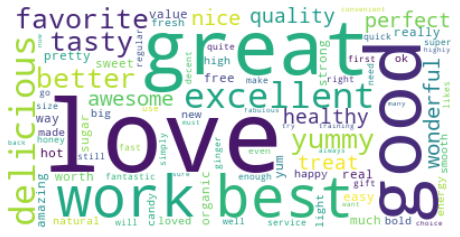

In [28]:
cloud(positive)   # for Positive Words

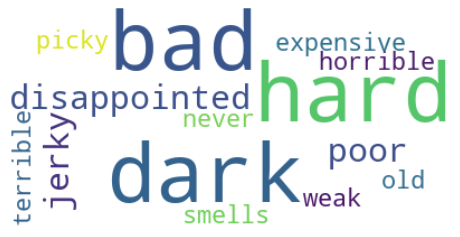

In [20]:
cloud(negative)  # for Negative Words

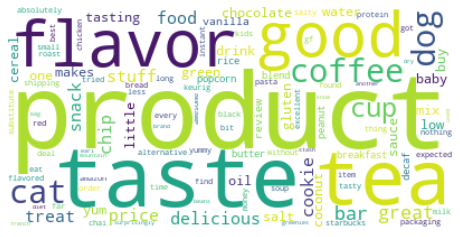

In [21]:
cloud(neutral) # for Neutral Words

In [22]:
positive_rate = [5,4]
negative_rate = [0,1,2]

In [23]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
def condition(x):
  if x['Score'] in positive_rate:
    return 'Positive'
  elif x['Score'] in negative_rate:
    return 'Negative'
  else:
    return 'Neutral'
  


In [32]:
data.apply(lambda x: condition(x), axis = 1)  # axis = 1 Means we are applying for each row
                                              # axis = 0 Means we are applying for each column

0         Positive
1         Negative
2         Positive
3         Negative
4         Positive
            ...   
568449    Positive
568450    Negative
568451    Positive
568452    Positive
568453    Positive
Length: 568454, dtype: object